# Bode and Nyquist plot examples

This notebook has various examples of Bode and Nyquist plots showing how these can be 
customized in different ways.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import control as ct

In [2]:
# Enable interactive figures (panning and zooming)
%matplotlib nbagg

## Define continuous systems

In [3]:
w001rad = 1.    # 1 rad/s
w010rad = 10.   # 10 rad/s
w100rad = 100.  # 100 rad/s
w001hz = 2*np.pi*1.    # 1 Hz
w010hz = 2*np.pi*10.   # 10 Hz
w100hz = 2*np.pi*100.  # 100 Hz
# First order systems
pt1_w001rad = ct.tf([1.], [1./w001rad, 1.], name='pt1_w001rad')
display(pt1_w001rad)
pt1_w001hz = ct.tf([1.], [1./w001hz, 1.], name='pt1_w001hz')
display(pt1_w001hz)
pt2_w001hz = ct.tf([1.], [1./w001hz**2,  1./w001hz, 1.], name='pt2_w001hz')
display(pt2_w001hz)
pt1_w001hzi = ct.tf([1., 0.], [1./w001hz, 1.], name='pt1_w001hzi')
display(pt1_w001hzi)
# Second order system
pt5hz = ct.tf(
    ct.tf([1.], [1./w001hz, 1.]) *
    ct.tf([1.], [1./w010hz**2, 1./w010hz, 1.]) *
    ct.tf([1.], [1./w100hz**2, 1./w100hz, 1.]), name='pt5hz')
display(pt5hz)


TransferFunction(array([1.]), array([1., 1.]))

TransferFunction(array([1.]), array([0.15915494, 1.        ]))

TransferFunction(array([1.]), array([0.0253303 , 0.15915494, 1.        ]))

TransferFunction(array([1., 0.]), array([0.15915494, 1.        ]))

TransferFunction(array([1.]), array([1.02117614e-10, 7.12202519e-08, 4.51924626e-05, 3.06749883e-03,
       1.76661987e-01, 1.00000000e+00]))

## Define sampled systems

In [4]:
sampleTime = 0.001
display('Nyquist frequency: {:.0f} Hz, {:.0f} rad/sec'.format(1./sampleTime /2., 2*np.pi*1./sampleTime /2.))

'Nyquist frequency: 500 Hz, 3142 rad/sec'

In [5]:
pt1_w001rads = ct.sample_system(pt1_w001rad, sampleTime, 'tustin', name='pt1_w001rads')
display(pt1_w001rads)
pt1_w001hzs = ct.sample_system(pt1_w001hz, sampleTime, 'tustin', name='pt1_w001hzs')
display(pt1_w001hzs)
pt1_w001hzis = ct.sample_system(pt1_w001hzi, sampleTime, 'tustin', name='pt1_w001hzis')
display(pt1_w001hzis)
pt2_w001hzs = ct.sample_system(pt2_w001hz, sampleTime, 'tustin', name='pt2_w001hzs')
display(pt2_w001hzs)
pt5s = ct.sample_system(pt5hz, sampleTime, 'tustin', name='pt5s')
display(pt5s)
pt5sh = ct.sample_system(pt5hz, sampleTime/4, 'tustin', name='pt5sh')
display(pt5sh)

TransferFunction(array([0.00049975, 0.00049975]), array([ 1.       , -0.9990005]), 0.001)

TransferFunction(array([0.00313175, 0.00313175]), array([ 1.        , -0.99373649]), 0.001)

TransferFunction(array([ 6.26350792, -6.26350792]), array([ 1.        , -0.99373649]), 0.001)

TransferFunction(array([9.83859843e-06, 1.96771969e-05, 9.83859843e-06]), array([ 1.        , -1.9936972 ,  0.99373655]), 0.001)

TransferFunction(array([2.09141504e-07, 1.04570752e-06, 2.09141505e-06, 2.09141504e-06,
       1.04570753e-06, 2.09141504e-07]), array([ 1.        , -4.20491439,  7.15468522, -6.21165862,  2.78011819,
       -0.51822371]), 0.001)

TransferFunction(array([2.73131184e-10, 1.36565426e-09, 2.73131739e-09, 2.73130674e-09,
       1.36565870e-09, 2.73130185e-10]), array([ 1.        , -4.81504111,  9.28609659, -8.96760178,  4.33708442,
       -0.84053811]), 0.00025)

## Draw Bode plots

### PT1 1rad/s plot with x-axis representing angular frequencies

<IPython.core.display.Javascript object>


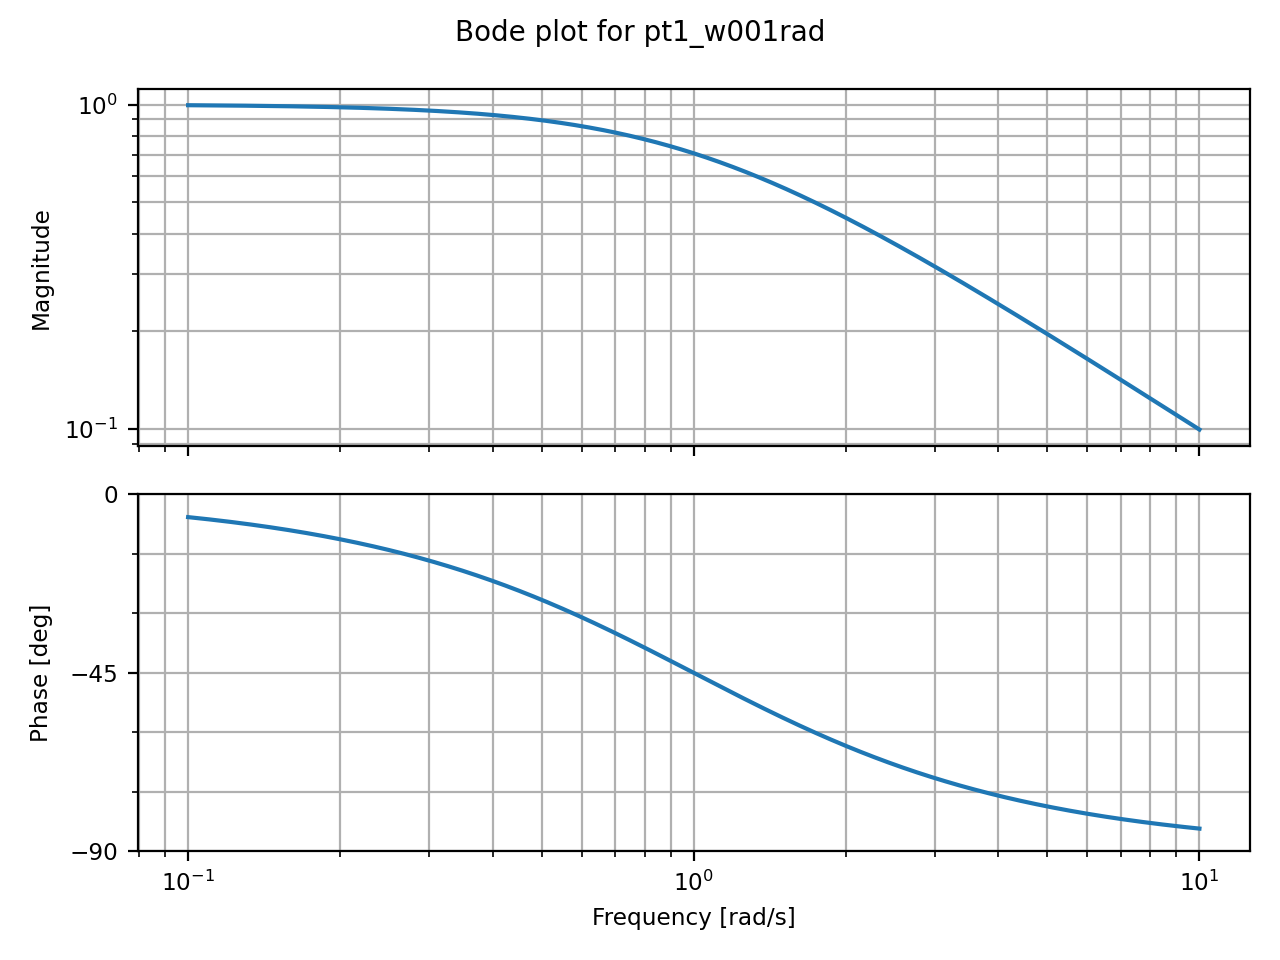

In [6]:
fig = plt.figure()
out = ct.bode_plot(pt1_w001rad, Hz=False)

### PT1 1rad/s discrete 

<IPython.core.display.Javascript object>


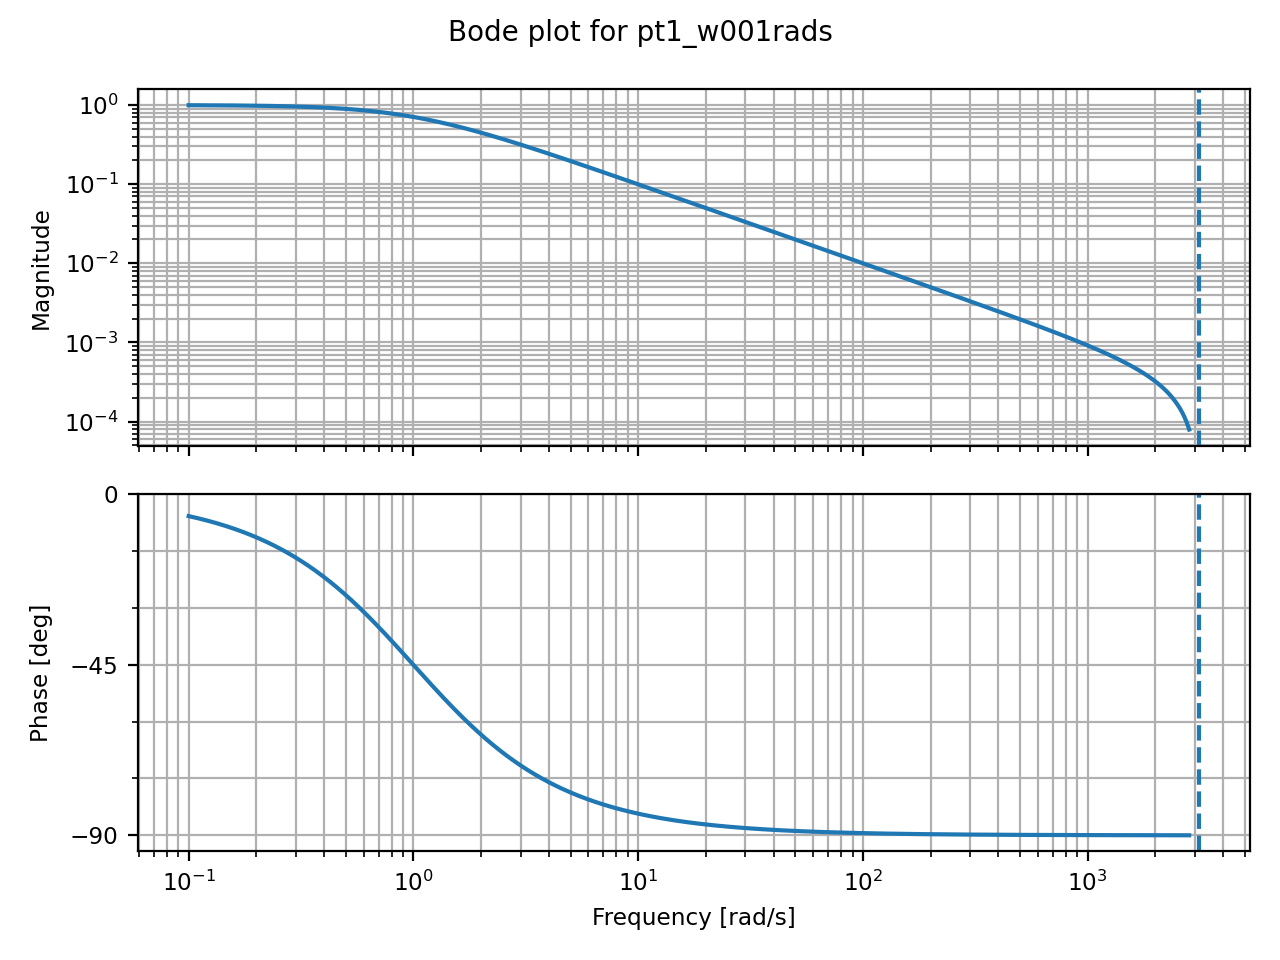

In [8]:
fig = plt.figure()
out = ct.bode_plot(pt1_w001rads, Hz=False)

### PT1 1Hz with x-axis representing regular frequencies (by default)

<IPython.core.display.Javascript object>


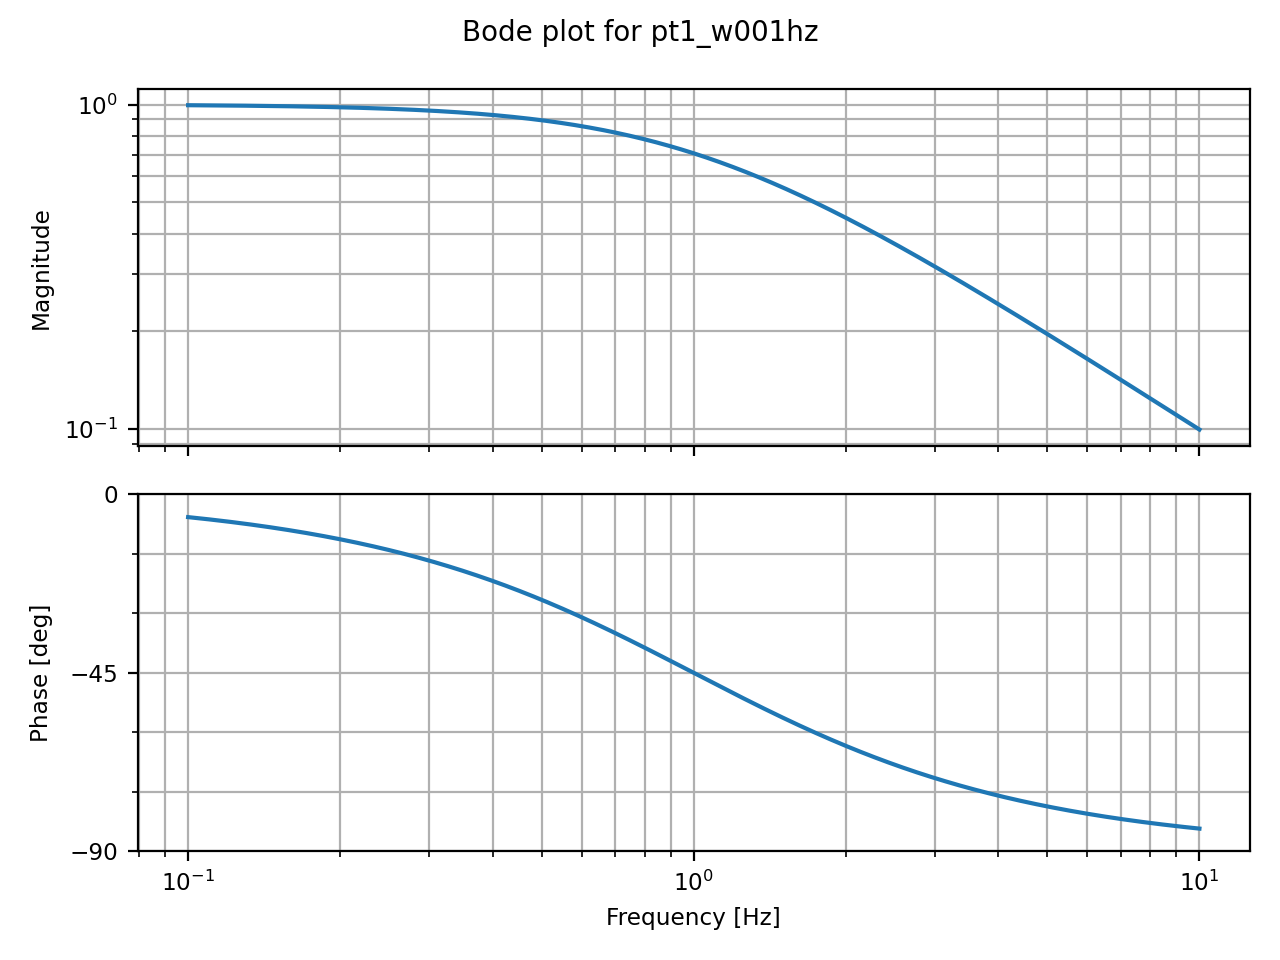

In [9]:
fig = plt.figure()
out = ct.bode_plot(pt1_w001hz, Hz=True)

### PT1 1Hz discrete 

<IPython.core.display.Javascript object>


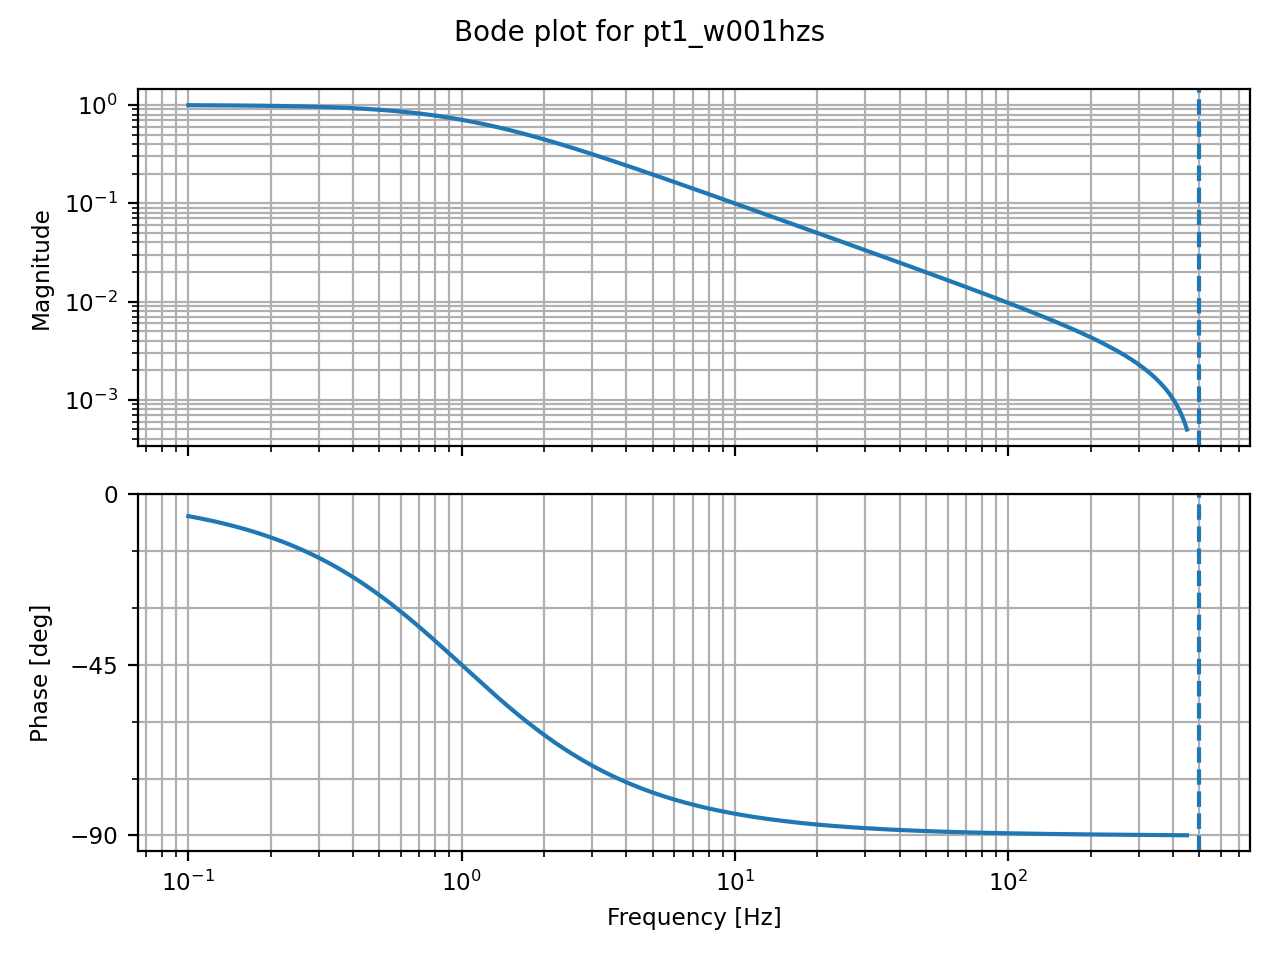

In [10]:
fig = plt.figure()
out = ct.bode_plot(pt1_w001hzs, Hz=True)

### PT1 with additional integrator, continuous and discrete

<IPython.core.display.Javascript object>


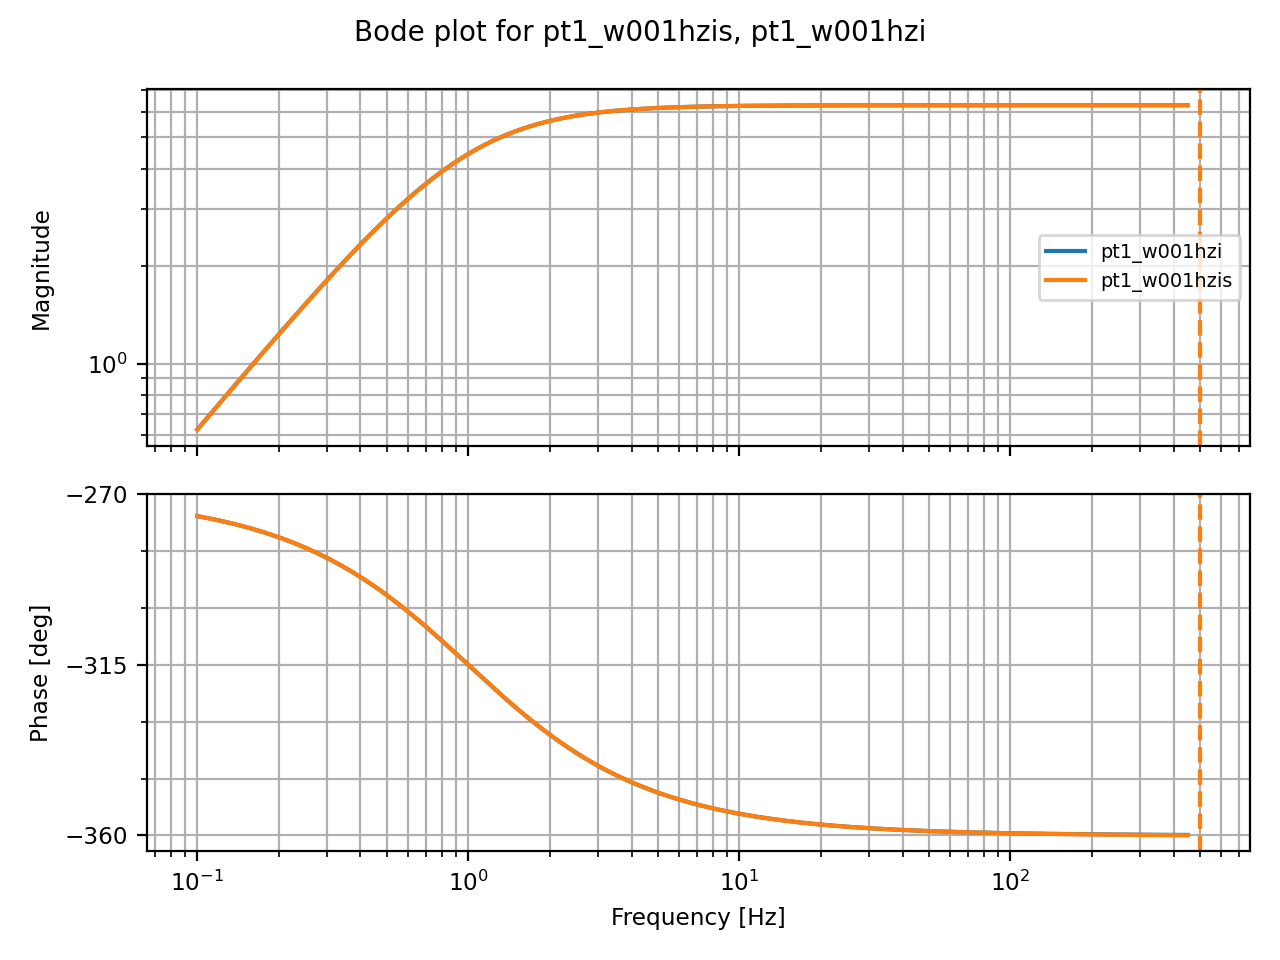

In [11]:
fig = plt.figure()
out = ct.bode_plot([pt1_w001hzi, pt1_w001hzis], Hz=True)

### Combination of various systems

<IPython.core.display.Javascript object>


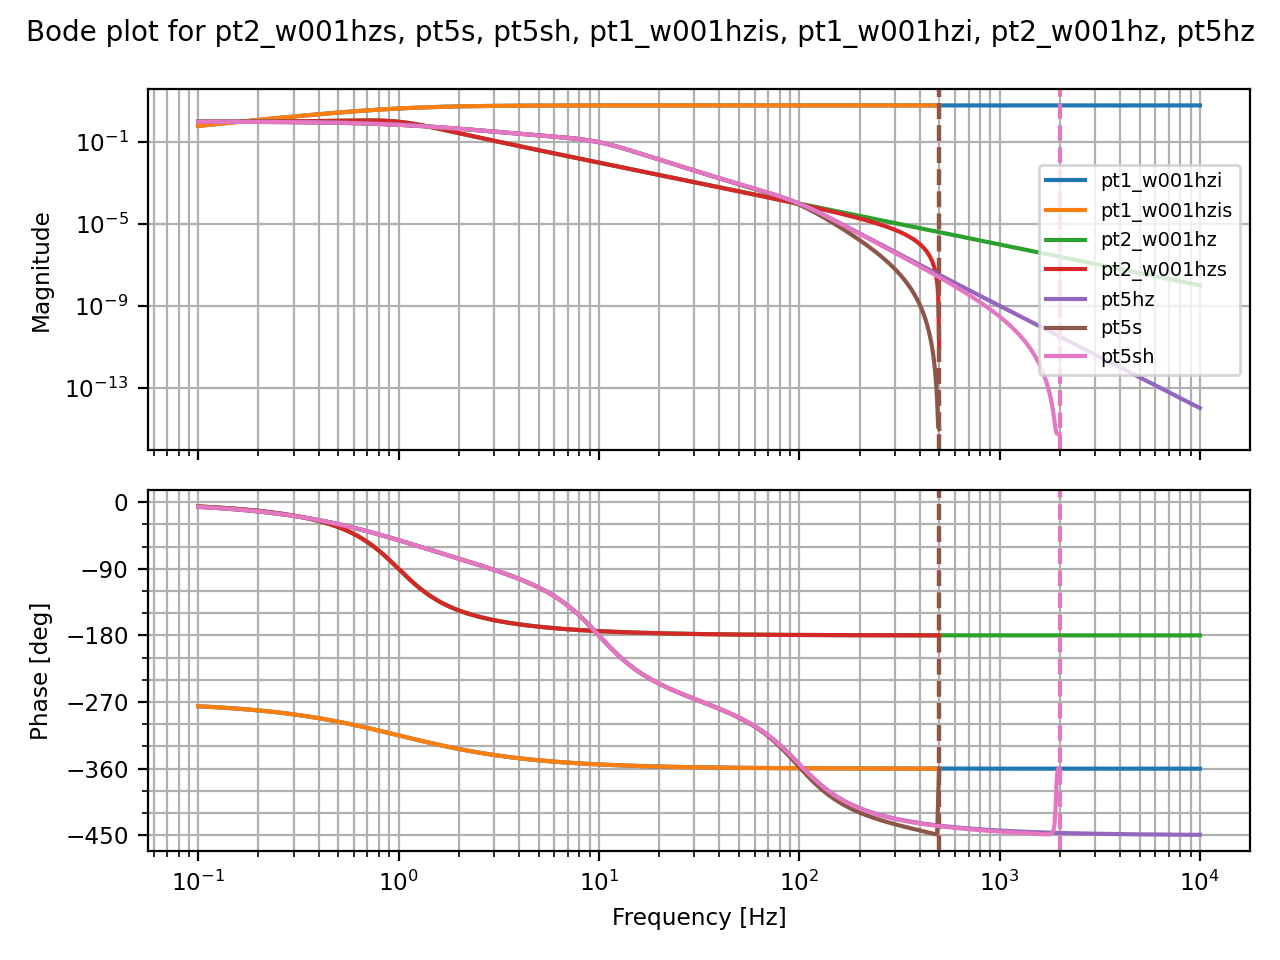

In [12]:
ct.config.defaults['freqplot.feature_periphery_decade']  = 1
ct.config.defaults['freqplot.bode_number_of_samples']  = 10000
fig = plt.figure()
out = ct.bode_plot(
    [pt1_w001hzi, pt1_w001hzis, pt2_w001hz, pt2_w001hzs, pt5hz, pt5s, pt5sh],
    Hz=True)

### Broader Bode plot

<IPython.core.display.Javascript object>


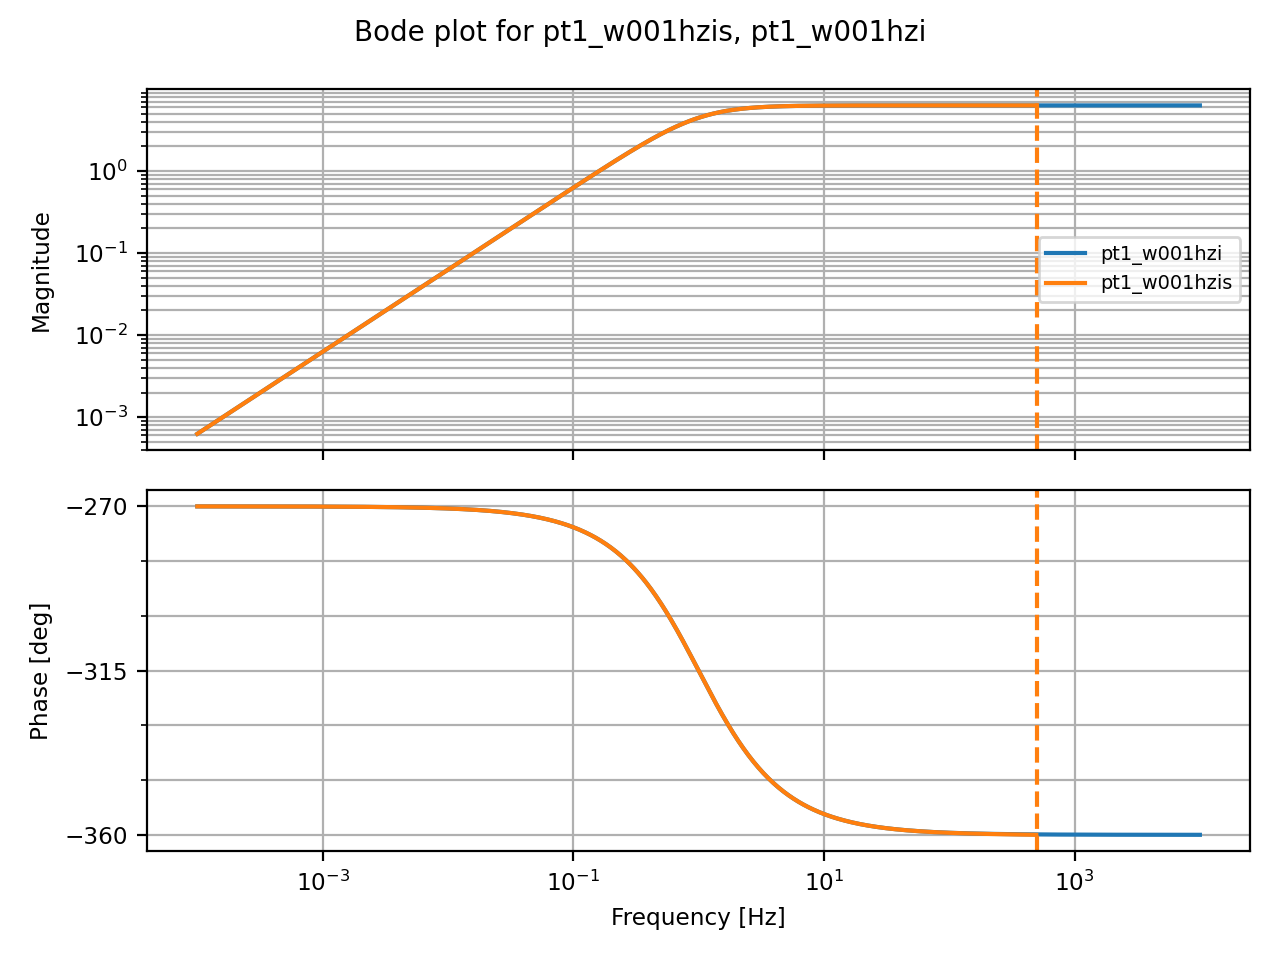

In [13]:
ct.config.defaults['freqplot.feature_periphery_decades'] = 3.5
fig = plt.figure()
out = ct.bode_plot([pt1_w001hzi, pt1_w001hzis], Hz=True)

### Phase plot in radian

<IPython.core.display.Javascript object>


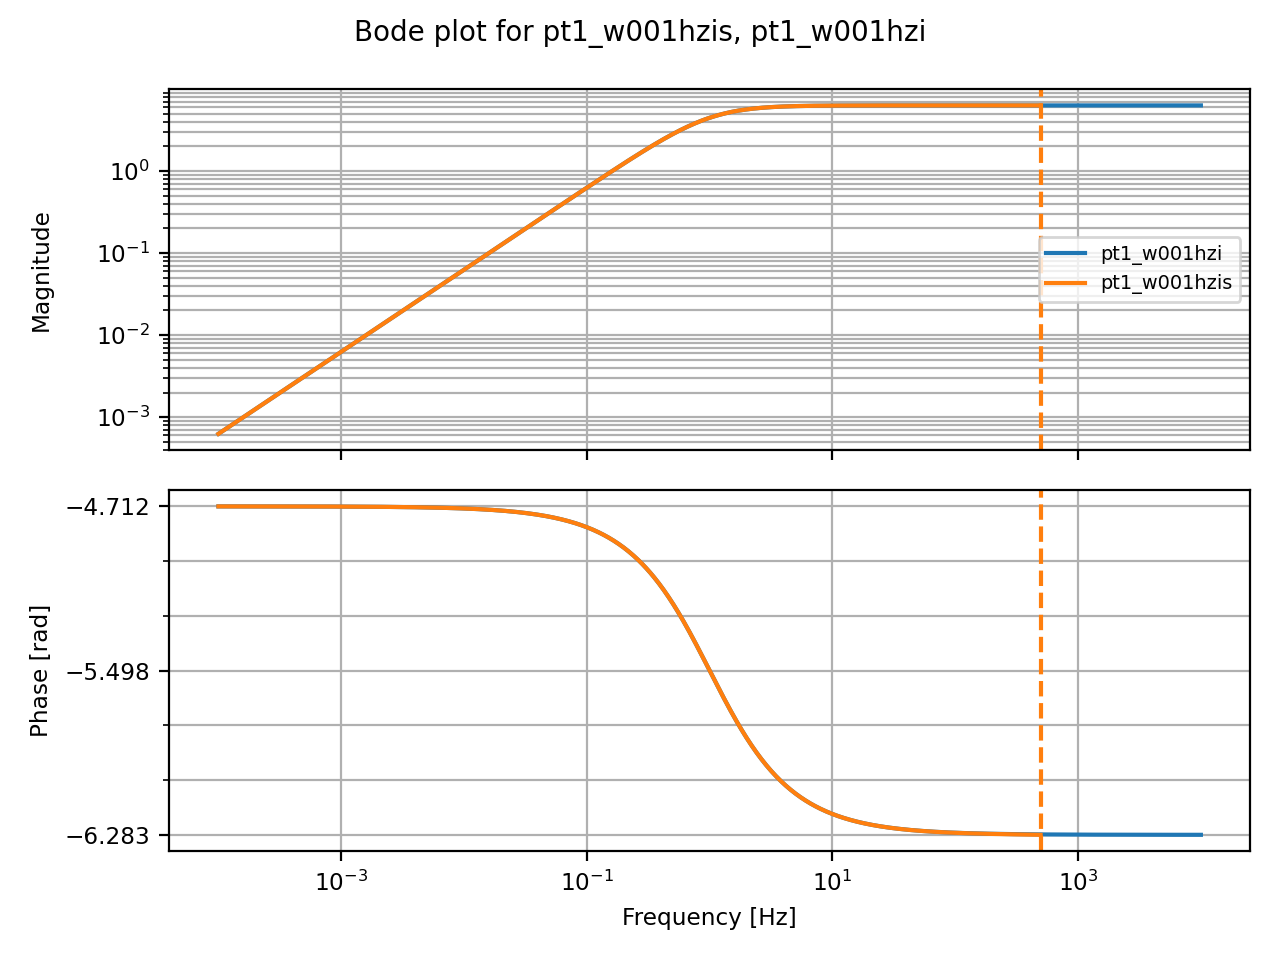

In [14]:
fig = plt.figure()
out = ct.bode_plot([pt1_w001hzi, pt1_w001hzis], deg=False, Hz=True)

### Truncate Bode plot between frequencies bounds

<IPython.core.display.Javascript object>


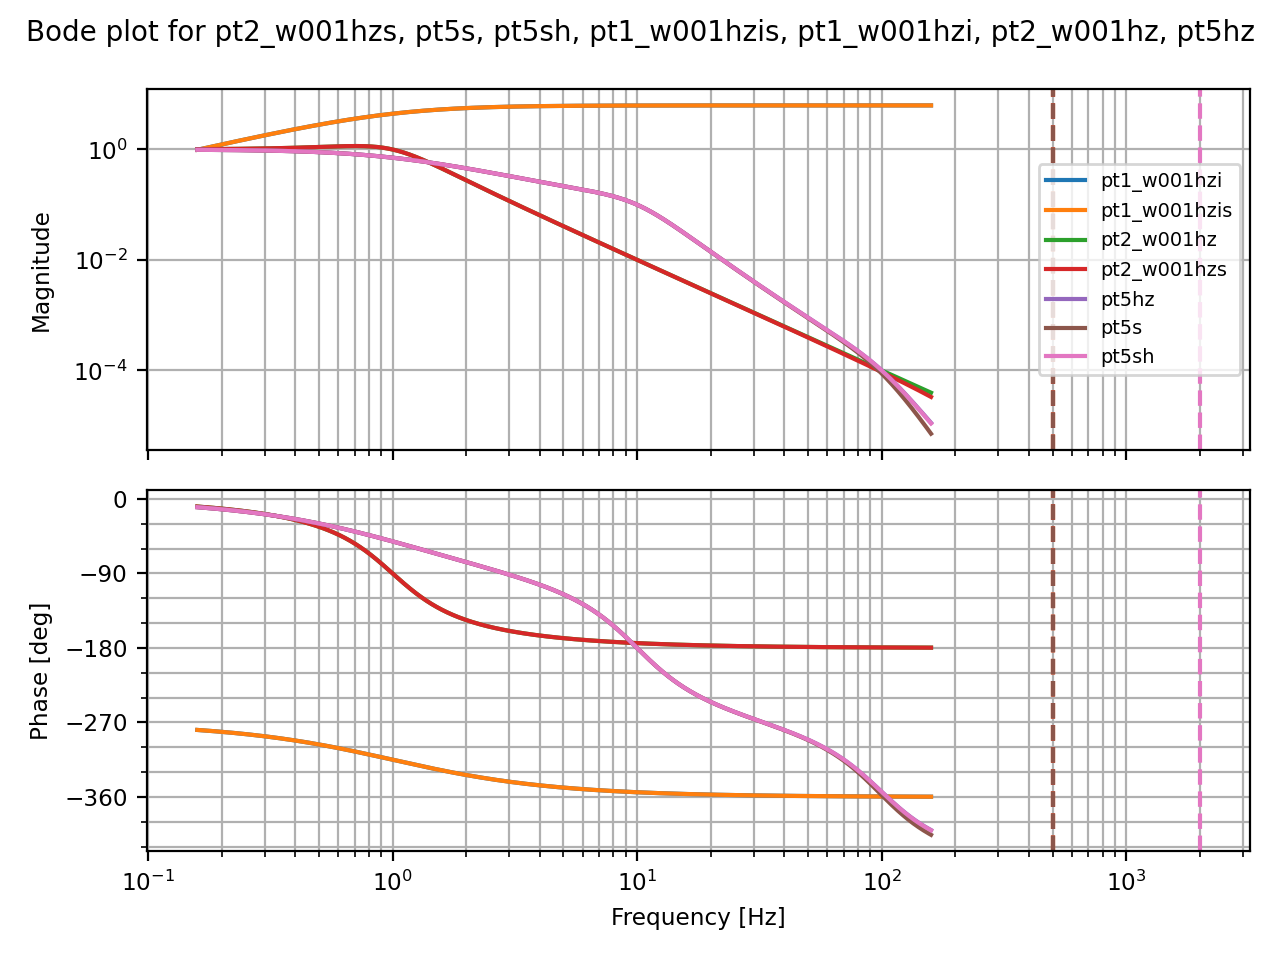

In [15]:
ct.config.defaults['bode_feature_periphery_decades'] = 1
ct.config.bode_number_of_samples  = 1000
fig = plt.figure()
out = ct.bode_plot(
    [pt1_w001hzi, pt1_w001hzis, pt2_w001hz, pt2_w001hzs, pt5hz, pt5s, pt5sh], 
    Hz=True, omega_limits=(1.,1000.))

<IPython.core.display.Javascript object>


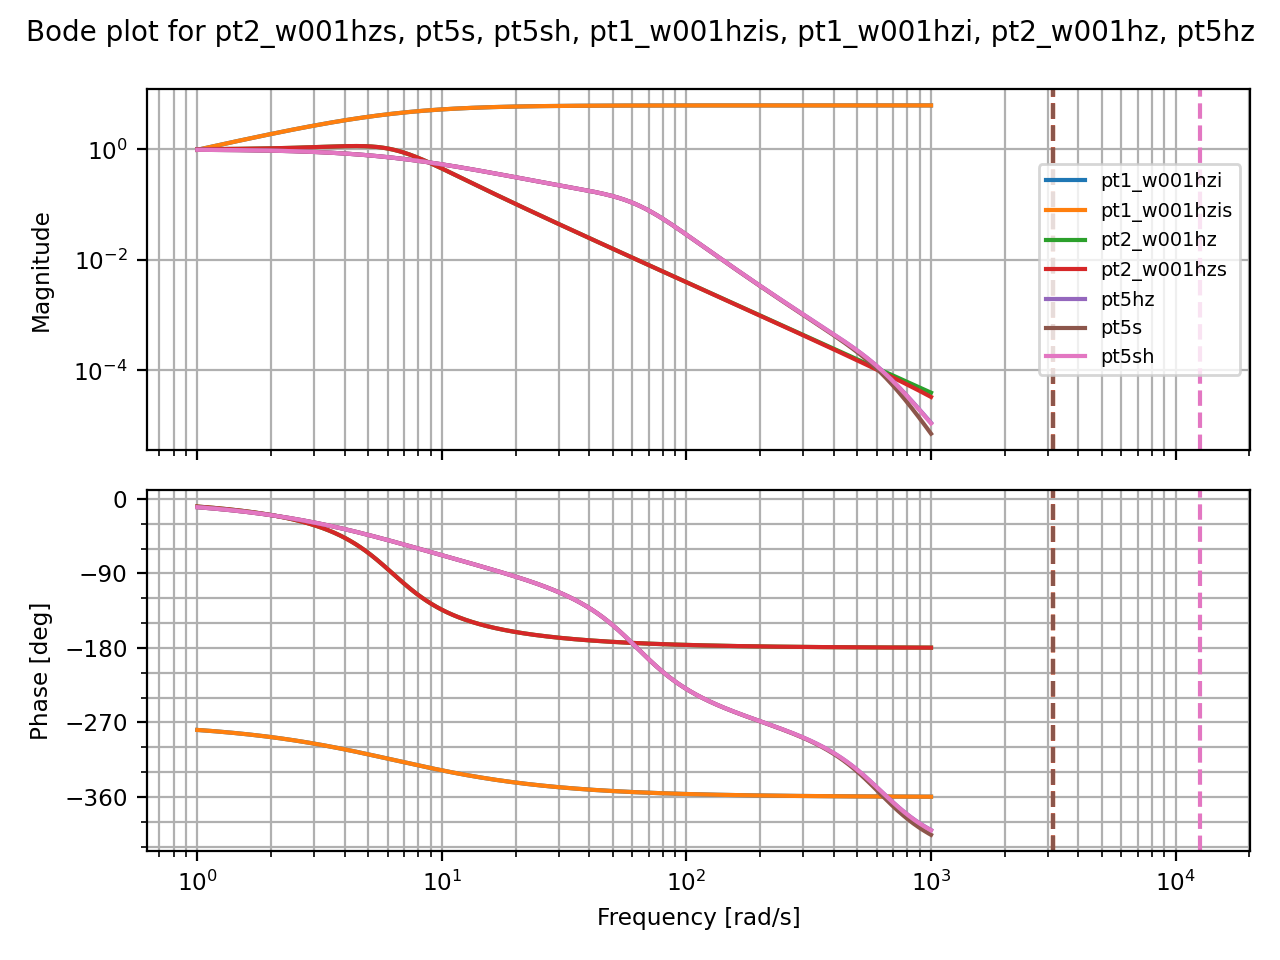

In [16]:
fig = plt.figure()
out = ct.bode_plot(
    [pt1_w001hzi, pt1_w001hzis, pt2_w001hz, pt2_w001hzs, pt5hz, pt5s, pt5sh], 
    Hz=False, omega_limits=(1.,1000.))

### Nyquist plot

<IPython.core.display.Javascript object>


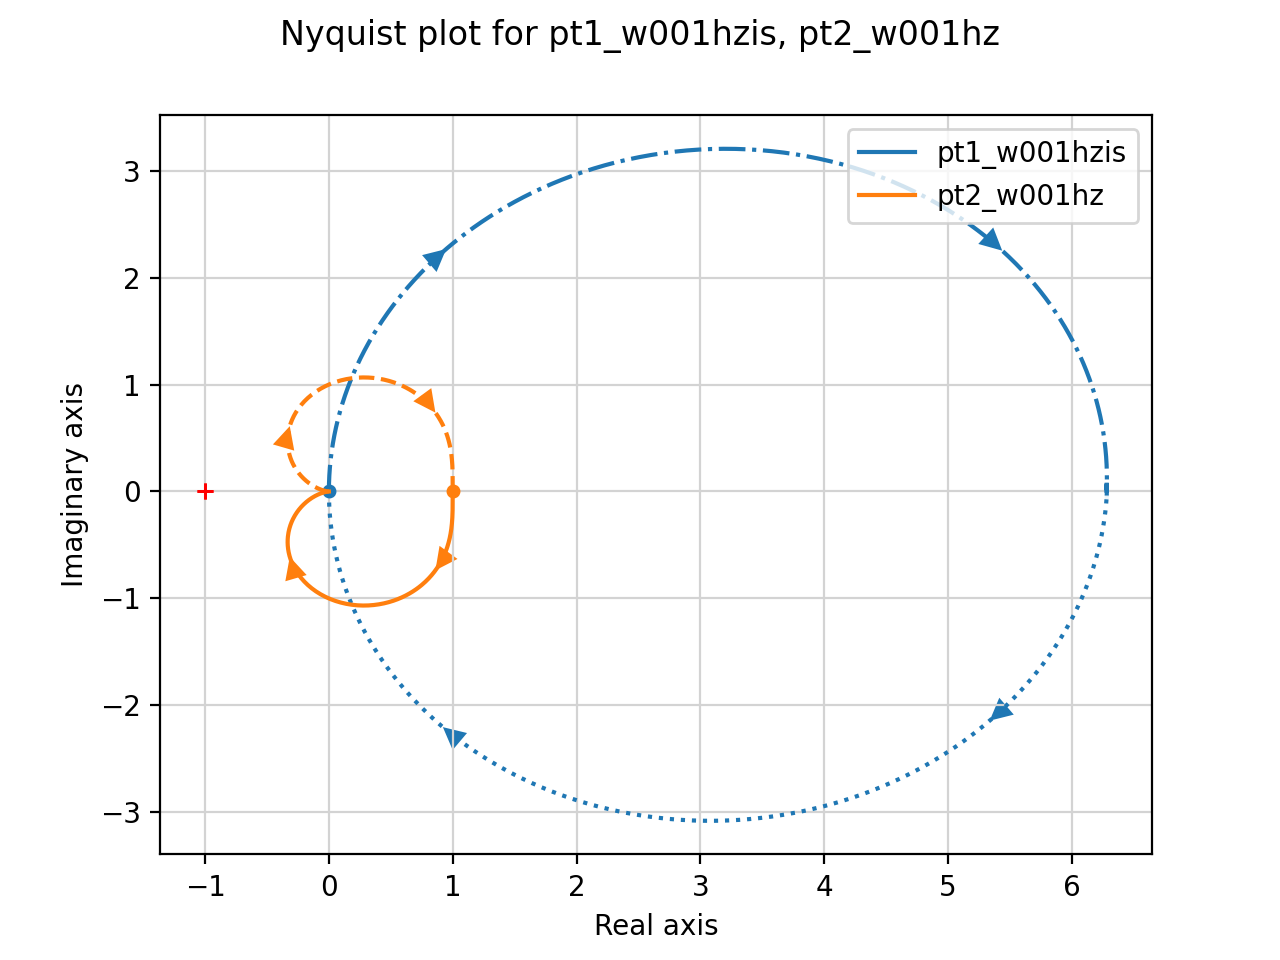

In [17]:
fig = plt.figure()
ct.nyquist_plot([pt1_w001hzis, pt2_w001hz]);